# EDA

### Some initial EDA for my beer recommender

I am only going to probably do look at the data and do some basic plots; these dependencies do that

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [41]:
beer_reviews = pd.read_csv("./socialmediadata-beeradvocate/data/beer_reviews.csv")

In [14]:
beer_reviews.shape

(1586614, 13)

In [3]:
beer_reviews.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
beer_reviews.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [5]:
beer_reviews.dtypes

brewery_id              int64
brewery_name           object
review_time             int64
review_overall        float64
review_aroma          float64
review_appearance     float64
review_profilename     object
beer_style             object
review_palate         float64
review_taste          float64
beer_name              object
beer_abv              float64
beer_beerid             int64
dtype: object

In [6]:
avg_by_beer_style = beer_reviews.groupby("beer_style")["review_overall","review_aroma","review_appearance","review_palate","review_taste"].mean()
avg_by_beer_style["counts"] = beer_reviews.groupby("beer_style").size()
avg_by_beer_style.sort_values(by="counts", ascending=False).head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,counts
beer_style,,,,,,
American IPA,3.965221,3.894103,3.968525,3.867476,3.922363,117586
American Double / Imperial IPA,3.998017,4.097782,4.078916,4.023128,4.091280,85977
American Pale Ale (APA),3.852306,3.657746,3.781610,3.684153,3.721423,63469
Russian Imperial Stout,4.023084,4.076576,4.210072,4.086922,4.149569,54129
American Double / Imperial Stout,4.029820,4.160665,4.163633,4.098669,4.187230,50705


In [7]:
avg_by_brewery_name = beer_reviews.groupby("brewery_name")["review_overall","review_aroma","review_appearance","review_palate","review_taste"].mean()
avg_by_brewery_name["counts"] = beer_reviews.groupby("brewery_name").size()
avg_by_brewery_name.sort_values(by="counts", ascending=False).head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,counts
brewery_name,,,,,,
Boston Beer Company (Samuel Adams),3.689522,3.593107,3.809299,3.641365,3.647171,39444
Dogfish Head Brewery,3.836047,3.916945,3.943763,3.895860,3.971350,33839
Stone Brewing Co.,4.040268,4.094644,4.152422,4.073550,4.150608,33066
Sierra Nevada Brewing Co.,4.056207,3.896682,4.096971,3.965184,4.028764,28751
"Bell's Brewery, Inc.",3.973066,3.938331,3.983724,3.965484,4.011572,25191


In [8]:
avg_beers_by_brewery_name = beer_reviews.groupby(["brewery_name","beer_style"])["review_overall","review_aroma","review_appearance","review_palate","review_taste"].mean()
avg_beers_by_brewery_name["counts"] = beer_reviews.groupby(["brewery_name","beer_style"]).size()
avg_beers_by_brewery_name.sort_values(by="counts", ascending=False).head(10)

,,review_overall,review_aroma,review_appearance,review_palate,review_taste,counts
brewery_name,beer_style,,,,,,
Sierra Nevada Brewing Co.,American IPA,4.150955,4.026592,4.212527,4.042834,4.133015,9420
Stone Brewing Co.,American Strong Ale,4.054657,4.143713,4.251497,4.155052,4.253727,7849
Dogfish Head Brewery,American Double / Imperial IPA,3.953045,4.101375,4.128815,4.064571,4.160707,7635
Founders Brewing Company,American Double / Imperial Stout,4.399412,4.489618,4.380411,4.446033,4.572968,5105
Unibroue,Belgian Strong Dark Ale,4.098937,4.109987,4.117807,4.074437,4.232694,4796
Anheuser-Busch,Light Lager,2.468323,1.894672,2.119208,2.043989,1.966197,4467
Stone Brewing Co.,American Double / Imperial IPA,4.071805,4.237353,4.125509,4.113882,4.232079,4171
Guinness Ltd.,Irish Dry Stout,3.686925,3.356416,4.124939,3.503632,3.472276,4130
Dogfish Head Brewery,American IPA,4.050170,3.922309,3.947151,3.930102,4.006941,4106


In [9]:
avg_by_beer_name = beer_reviews.groupby(["beer_name","brewery_name"])["review_overall","review_aroma","review_appearance","review_palate","review_taste"].mean()
avg_by_beer_name["counts"] = beer_reviews.groupby(["beer_name","brewery_name"]).size()
avg_by_beer_name.sort_values(by="counts", ascending=False).head()

,,review_overall,review_aroma,review_appearance,review_palate,review_taste,counts
beer_name,brewery_name,,,,,,
90 Minute IPA,Dogfish Head Brewery,4.145745,4.213526,4.192097,4.181763,4.325988,3290
Old Rasputin Russian Imperial Stout,North Coast Brewing Co.,4.174221,4.198650,4.373995,4.231758,4.342173,3111
Sierra Nevada Celebration Ale,Sierra Nevada Brewing Co.,4.168667,4.082333,4.225167,4.076000,4.190000,3000
Two Hearted Ale,"Bell's Brewery, Inc.",4.329729,4.266496,4.153959,4.138746,4.318915,2728
Arrogant Bastard Ale,Stone Brewing Co.,4.078402,4.119268,4.296413,4.143121,4.278846,2704


In [10]:
user_reviews = beer_reviews.groupby(["review_profilename"])["review_overall","review_aroma","review_appearance","review_palate","review_taste"].mean()
user_reviews["counts"] = beer_reviews.groupby(["review_profilename"]).size()
user_reviews.counts.mean()

47.511486506724175

In [43]:
beer_reviews.corr()

,review_overall,review_aroma,review_appearance,review_palate,review_taste
review_overall,1.000000,0.616013,0.501732,0.701914,0.789816
review_aroma,0.616013,1.000000,0.561029,0.616947,0.716776
review_appearance,0.501732,0.561029,1.000000,0.566634,0.546980
review_palate,0.701914,0.616947,0.566634,1.000000,0.734135
review_taste,0.789816,0.716776,0.546980,0.734135,1.000000


In [51]:
beer_reviews.groupby("beer_name")["review_overall"].count().mean()

27.905341470707214

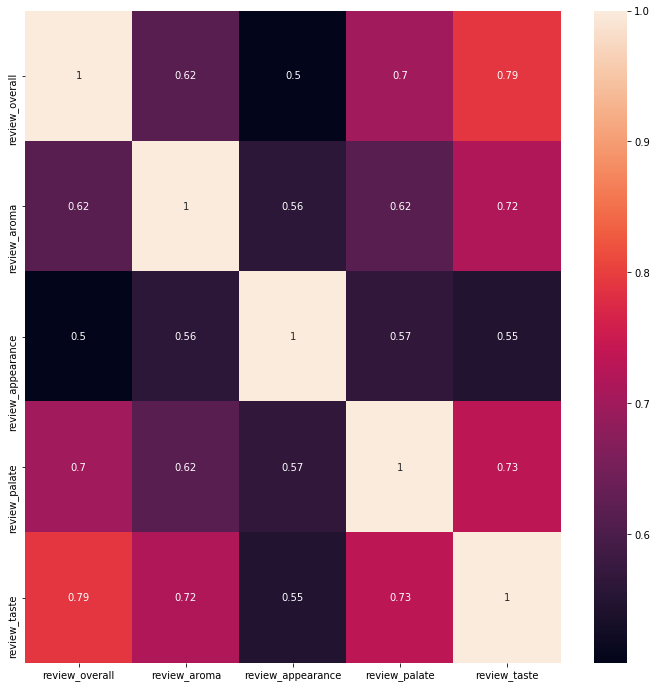

In [42]:
import seaborn as sns
plt.figure(figsize=(12,12))
beer_reviews.drop(columns=["brewery_id","review_time","beer_abv","beer_beerid"], inplace=True)
sns.heatmap(beer_reviews.corr()[(beer_reviews.corr() > .5) | (beer_reviews.corr() < -.5)], annot=True)
plt.savefig("./public/images/heatmap.png", bbox_inches='tight')

In [15]:
text_reviews = pd.read_csv("./petergensler-beer-advocate-reviews/BeerAdvocate-000.csv")

In [16]:
text_reviews.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,review_profileName,review_taste,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [17]:
text_reviews.shape

(528870, 13)

In [18]:
text_reviews.isnull().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_aroma              0
review_overall            0
review_palate             0
review_profileName      115
review_taste              0
review_text             119
review_time               0
dtype: int64

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [20]:
text_reviews.dropna(inplace=True)

In [21]:
# TODO do some count_vectorization stuff

In [22]:
brewery_json = pd.read_json("./scrape_ba/breweries.json")

In [24]:
brewery_json.head()

,address,city,country,features,link,name,phone_number,state,zipcode
0,3090 Shirley Dr,Jackson,United States,"Brewery, Bar, Beer-to-go",https://www.beeradvocate.com/beer/profile/34957/,127 Brewing Company,(517) 258-1346,Michigan,49201-7010
1,100 W.Portage Ave,Sault Ste Marie,United States,"Brewery, Bar, Eatery",https://www.beeradvocate.com/beer/profile/46669/,1668 Winery & Lockside Brewery,(906) 259-5035,Michigan,49783
2,1638 142nd Ave,Dorr,United States,"Brewery, Bar, Eatery",https://www.beeradvocate.com/beer/profile/48559/,5 Lakes Brewing Co.,(616) 359-9555,Michigan,49323
3,1310 W Washington St,Greenville,United States,"Brewery, Bar, Eatery, Beer-to-go",https://www.beeradvocate.com/beer/profile/32165/,57 Brew Pub & Bistro,(616) 712-6226,Michigan,48838-2190
4,15 Cross St,Ypsilanti,United States,"Brewery, Bar",https://www.beeradvocate.com/beer/profile/53225/,734 Brewing Company,(734) 340-3468,Michigan,48198


In [25]:
brewery_json.shape

(7232, 9)

In [33]:
brewery_json.groupby("state")["state"].count().sort_values(ascending=False).head(10)

state
California        850
New York          405
Washington        382
Colorado          374
Pennsylvania      346
Michigan          314
Florida           297
Texas             281
North Carolina    273
Oregon            268
Name: state, dtype: int64

In [35]:
brewery_json.groupby("features")["features"].count().sort_values(ascending=False).head()

features
Brewery, Bar, Beer-to-go            2141
Brewery, Bar, Eatery, Beer-to-go    1571
Brewery, Bar, Eatery                1169
Brewery                              989
Brewery, Bar                         920
Name: features, dtype: int64